<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logo.jpg" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Abuzer Yakaryilmaz | May 1, 2019 (updated)<br>
        Özlem Salehi |July 14, 2019 (updated)
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> <font color="blue"> Solutions for </font>Grover's Search: One Qubit Representation</h2>

<a id="task1"></a>
<h3> Task 1 </h3>

Design a quantum circuit with 4 qubits.

Apply Hadamard to each qubit and perform a measurement.

Execute your circuit 1600 times.

You should observe each basis state around 100 times.

Reexecute your circuit 16000 times.

<h3> Solution </h3>

In [0]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg = QuantumRegister(4) # quantum register with 4 qubits
creg = ClassicalRegister(4) # classical register with 4 bits
mycircuit = QuantumCircuit(qreg,creg) # quantum circuit with quantum and classical registers

# apply h-gate (Hadamard) to each qubit
for i in range(4):
    mycircuit.h(qreg[i])

# measure all qubits
mycircuit.measure(qreg,creg)
    
# execute the circuit 1600 times, and print the outcomes
job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=1600)
counts = job.result().get_counts(mycircuit)
for outcome in counts:
    reverse_outcome = ''
    for i in outcome:
        reverse_outcome = i + reverse_outcome
    print(reverse_outcome,"is observed",counts[outcome],"times")

<a id="task2"></a>
<h3> Task 2 </h3>

If $ \frac{1}{\sqrt{16}} \mypar{ \ket{marked1} + \ket{marked2} + \ket{marked3} } = a \ket{u_{marked}} $, then 
<ul>
    <li> find the value of $a$ </li>
    <li> and $ \ket{u_{marked}} $, </li>
</ul>
where $ u_{marked} $ should be a quantum state (unit vector).

If $ \frac{1}{\sqrt{16}} \mypar{  \ket{unmarked1} + \ket{unmarked2} + \cdots + \ket{unmarked13} } = b \ket{u_{unmarked}} $, then 
<ul>
    <li> find the value of $b$ </li>
    <li> and $ \ket{u_{unmarked}} $, </li>
</ul>
where $ u_{unmarked} $ should be a quantum state (unit vector).

<h3> Solution </h3>

We start with $ \ket{marked1} + \ket{marked2} + \ket{marked3} $. The length of this vector is $ \sqrt{1^2+1^2+1^2} = \sqrt{3} $.

Therefore, this vector can have length 1 after normalizing by factor $ \frac{1}{\sqrt{3}} $. 

Thus, 

$$ 
\frac{1}{\sqrt{16}} \mypar{ \ket{marked1} + \ket{marked2} + \ket{marked3} } 
= \frac{1}{\sqrt{16}} \frac{\sqrt{3}}{\sqrt{3}} \mypar{ \ket{marked1} + \ket{marked2} + \ket{marked3} }, 
$$
which is equivalent to
$$
    = \frac{\sqrt{3}}{\sqrt{16}} \mypar{ \dfrac{ \ket{marked1} + \ket{marked2} + \ket{marked3} } {\sqrt{3}} }.
$$

Thus, $ a = \sqrt{\dfrac{3}{16}} $ and $ \ket{u_{marked}} = \mypar{ \dfrac{ \ket{marked1} + \ket{marked2} + \ket{marked3} } {\sqrt{3}} } $.
<hr>

We continue with $ \ket{unmarked1} + \ket{unmarked2} + \cdots + \ket{unmarked13} $. The length of this vector is $ \sqrt{\underbrace{1^2+\cdots+1^2}_{13~times}} = \sqrt{13} $.

Therefore, this vector can have length 1 after normalizing by factor $ \frac{1}{\sqrt{13}} $. 

Thus, 

$$ 
\frac{1}{\sqrt{16}} \mypar{ \ket{unmarked1} + \ket{unmarked2} + \cdots + \ket{unmarked13} } 
= \frac{1}{\sqrt{16}} \frac{\sqrt{13}}{\sqrt{13}} \mypar{ \ket{unmarked1} + \ket{unmarked2} + \cdots + \ket{unmarked13} }, 
$$
which is equivalent to
$$
    = \frac{\sqrt{13}}{\sqrt{16}} \mypar{ \dfrac{ \ket{unmarked1} + \ket{unmarked2} + \cdots + \ket{unmarked13} } {\sqrt{13}} }.
$$

Thus, $ b = \sqrt{\dfrac{13}{16}} $ and $ \ket{u_{unmarked}} = \mypar{ \dfrac{ \ket{unmarked1} + \ket{unmarked2} + \cdots + \ket{unmarked13} } {\sqrt{3}} } $.
<hr>

The idea here is to select $ \ket{u_{marked}} $ and $\ket{u_{unmarked}} $ as quantum states, i.e., their lengths should be 1. 

In this way, we can also keep the ratio of $ \frac{3}{13} $ as ratio of
<ul>
    <li> the probability of observing a state in $ \ket{u_{marked}} $ and </li>
    <li> the probability of observing a state in $ \ket{u_{unmarked}} $. </li>
</ul>

Remark that the first probability is $ a^2 = \frac{3}{16} $ and the second probability is $ b^2 = \frac{13}{16} $.

<a id="task3"></a>
<h3> Task 3</h3>

Set the value of $ k $ to 4. Then, the size of list is $ 2^k = 16 $.

Pick the value of $ m $ as 3, the number of the marked elements.

<i> In general, if we have $ 2^k $ elements and $ m $ of them are marked, then $ a = \frac{\sqrt{m}}{\sqrt{2^k}} $ and  $ b= \frac{\sqrt{2^k - m}}{\sqrt{2^k}} $. </i>

$ \ket{u} = \sqrt{\frac{3}{16}} \ket{u_{marked}} + \sqrt{\frac{13}{16}} \ket{u_{unmarked}} $.

Create a quantum circuit with single qubit.

Suppose that the states $ \ket{1} $ and $ \ket{0} $ represent the quantum states $ \ket{u_{marked}} $ and $ \ket{u_{unmarked}}$, respectively.

Then, $ \ket{u} = \sqrt{\frac{13}{16}} \ket{0} + \sqrt{\frac{3}{16}} \ket{1} $.

<b>Determine the angle $ \theta $, the angle between $ \ket{u} $ and $ \ket{0} $.</b>

<b>Iterate Grover's search algorithm once by using your quantum circuit.</b>

For each reflection, use ry-gate (rotation).
<ul>
    <li> Define a list to store all quantum states (with their labels) that will be visited.</li>
    <li> Implement the first reflection on your qubit. </li>
    <li> Read the current quantum state and store it on your list. </li>
    <li> Implement the second reflection on your qubit. </li>
    <li> Read the current quantum state and store it on your list.</li>
    <li> Draw all visited quantum states with their labels. </li>
    <li> Execute your circuit 100 times. </li>
</ul>

Is this single iteration enough to observe state $ \ket{1} $ more than state $ \ket{0} $? 

<h3> Solution </h3>

<h4> One iteration of Grover's search algorithm </h4>

{'0': 10, '1': 90}


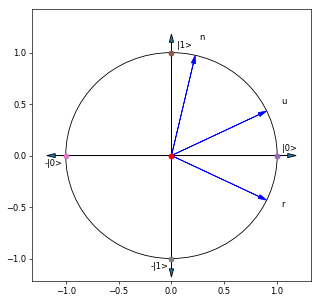

In [5]:
# include our predefined functions
%run qlatvia.py

# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import acos, pi
# after Hadamard operators
u = [(13/16)**0.5,(3/16)**0.5]

def angle_between_two_states(u1,u2):
    dot_product = u1[0]*u2[0]+u1[1]*u2[1]
    return acos(dot_product)

theta = angle_between_two_states(u,[1,0])

all_visited_quantum_states =[]


qreg2 = QuantumRegister(1) # quantum register with 1 qubit
creg2 = ClassicalRegister(1) # classical register with 1 bit
mycircuit2 = QuantumCircuit(qreg2,creg2) # quantum circuit with quantum and classical registers


# set the qubit to |u> by rotating it by theta
mycircuit2.ry(2*theta,qreg2[0])

# read and store the current quantum state
current_state = execute(mycircuit2,Aer.get_backend('statevector_simulator')).result().get_statevector(mycircuit2)
[x,y] = [current_state[0].real,current_state[1].real]
all_visited_quantum_states.append([x,y,'u'])


# the first reflection
theta = angle_between_two_states([x,y],[1,0])
mycircuit2.ry(2*(-2*theta),qreg2[0])

# read and store the current quantum state
current_state = execute(mycircuit2,Aer.get_backend('statevector_simulator')).result().get_statevector(mycircuit2)
[x,y] = [current_state[0].real,current_state[1].real]
all_visited_quantum_states.append([x,y,'r'])



# the second reflection 
theta = angle_between_two_states(u,[x,y])
mycircuit2.ry(2*(2*theta),qreg2[0])

# read and store the current quantum state
current_state = execute(mycircuit2,Aer.get_backend('statevector_simulator')).result().get_statevector(mycircuit2)
[x,y] = [current_state[0].real,current_state[1].real]
all_visited_quantum_states.append([x,y,'n'])    
    
# measure the qubit
mycircuit2.measure(qreg2,creg2)
    
    
# execute the circuit 100 times, and print the outcomes
job = execute(mycircuit2,Aer.get_backend('qasm_simulator'),shots=100)
counts2 = job.result().get_counts(mycircuit2)
print(counts2)

# visualization
draw_qubit()
for quantum_state in all_visited_quantum_states:
    draw_quantum_state(quantum_state[0],quantum_state[1],quantum_state[2])


<a id="task4"></a>
<h3> Task 4 </h3>
Set the value of $ k $ to 6. Then, the size of list is $ 2^k = 64 $.

Pick the value of $ m $ as 1, the number of the marked elements.

As described above, $ \ket{u} = \sqrt{\frac{1}{64}} \ket{u_{marked}} + \sqrt{\frac{63}{64}} \ket{u_{unmarked}} $.

Create a quantum circuit with single qubit.

Suppose that the states $ \ket{1} $ and $ \ket{0} $ represent the quantum states $ \ket{u_{marked}} $ and $ \ket{u_{unmarked}}$, respectively.

Then, $ \ket{u} = \sqrt{\frac{63}{64}} \ket{0} + \sqrt{\frac{1}{64}} \ket{1} $.

<b>Determine the angle $ \theta $, the angle between $ \ket{u} $ and $ \ket{0} $.</b>

<b>Iterate Grover's search algorithm <u>three times</u> by using your quantum circuit.</b>

For each reflection, use ry-gate (rotation).
<ul>
    <li> Define a list to store all quantum states (with their labels) that will be visited.</li>
    <li> Iterate 3 times:
        <ul>
            <li> Implement the first reflection on your qubit. </li>
            <li> Read the current quantum state and store it on your list. </li>
            <li> Implement the second reflection on your qubit. </li>
            <li> Read the current quantum state and store it on your list.</li>
        </ul> </li>
    <li> Draw all visited quantum states with their labels. </li>
    <li> Execute your circuit 100 times. </li>
</ul>

Is 3 iterations enough to observe state $ \ket{1} $ more than state $ \ket{0} $?

Try 4, 5, 6, 7, 8, 9, and 10 iterations.

What is the best number of iterations?

<h3> Solution </h3>

{'1': 100}


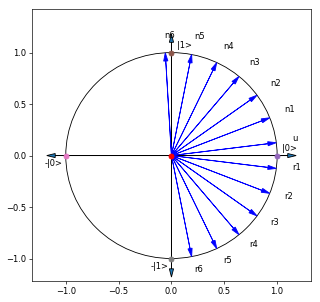

In [4]:
# include our predefined functions
%run qlatvia.py

# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import acos, pi
# after Hadamard operators
u = [(63/64)**0.5,(1/64)**0.5]

def angle_between_two_states(u1,u2):
    dot_product = u1[0]*u2[0]+u1[1]*u2[1]
    return acos(dot_product)

theta = angle_between_two_states(u,[1,0])

all_visited_quantum_states =[]


qreg3 = QuantumRegister(1) # quantum register with 1 qubit
creg3 = ClassicalRegister(1) # classical register with 1 bit
mycircuit3 = QuantumCircuit(qreg3,creg3) # quantum circuit with quantum and classical registers


# set the qubit to |u> by rotating it by theta
mycircuit3.ry(2*theta,qreg3[0])

# read and store the current quantum state
current_state = execute(mycircuit3,Aer.get_backend('statevector_simulator')).result().get_statevector(mycircuit3)
[x,y] = [current_state[0].real,current_state[1].real]
all_visited_quantum_states.append([x,y,'u'])


# three iterations
for i in range(6): # 4,5,6,7,8,9,10
    # the first reflection
    theta = angle_between_two_states([x,y],[1,0])
    mycircuit3.ry(2*(-2*theta),qreg3[0])

    # read and store the current quantum state
    current_state = execute(mycircuit3,Aer.get_backend('statevector_simulator')).result().get_statevector(mycircuit3)
    [x,y] = [current_state[0].real,current_state[1].real]
    all_visited_quantum_states.append([x,y,'r'+str(i+1)])

    # the second reflection 
    theta = angle_between_two_states(u,[x,y])
    mycircuit3.ry(2*(2*theta),qreg3[0])

    # read and store the current quantum state
    current_state = execute(mycircuit3,Aer.get_backend('statevector_simulator')).result().get_statevector(mycircuit3)
    [x,y] = [current_state[0].real,current_state[1].real]
    all_visited_quantum_states.append([x,y,'n'+str(i+1)])    
    
# measure the qubit
mycircuit3.measure(qreg3,creg3)
    
    
# execute the circuit 100 times, and print the outcomes
job = execute(mycircuit3,Aer.get_backend('qasm_simulator'),shots=100)
counts3 = job.result().get_counts(mycircuit3)
print(counts3)

# visualization
draw_qubit()
for quantum_state in all_visited_quantum_states:
    draw_quantum_state(quantum_state[0],quantum_state[1],quantum_state[2])


<hr>
<a id="task5"></a>
<h3> Task 5 </h3>

Repeat Task 4 for $ k = 4 $ and $ m = 12 $.

However, iterate the algorithm for 1, 2, 3, and then 4 times, and visualize only $ \ket{u} $ and the states from the last iteration. 

<h3> Solution </h3>

{'0': 100}


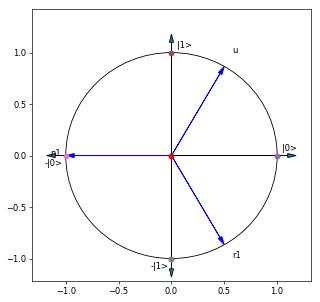

In [6]:
# include our predefined functions
%run qlatvia.py

# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import acos, pi
# after Hadamard operators
u = [(4/16)**0.5,(12/16)**0.5]

def angle_between_two_states(u1,u2):
    dot_product = u1[0]*u2[0]+u1[1]*u2[1]
    return acos(dot_product)

theta = angle_between_two_states(u,[1,0])

all_visited_quantum_states = []


qreg3 = QuantumRegister(1) # quantum register with 1 qubit
creg3 = ClassicalRegister(1) # classical register with 1 bit
mycircuit3 = QuantumCircuit(qreg3,creg3) # quantum circuit with quantum and classical registers


# set the qubit to |u> by rotating it by theta
mycircuit3.ry(2*theta,qreg3[0])

# read and store the current quantum state
current_state = execute(mycircuit3,Aer.get_backend('statevector_simulator')).result().get_statevector(mycircuit3)
[x,y] = [current_state[0].real,current_state[1].real]
all_visited_quantum_states.append([x,y,'u'])


# three iterations
number_of_iterations = 1 # 2, 3, and 4 
for i in range(number_of_iterations): 
    # the first reflection
    theta = angle_between_two_states([x,y],[1,0])
    mycircuit3.ry(2*(-2*theta),qreg3[0])

    # read and store the current quantum state
    current_state = execute(mycircuit3,Aer.get_backend('statevector_simulator')).result().get_statevector(mycircuit3)
    [x,y] = [current_state[0].real,current_state[1].real]
    if i == number_of_iterations -1: all_visited_quantum_states.append([x,y,'r'+str(i+1)])

    # the second reflection 
    theta = angle_between_two_states(u,[x,y])
    mycircuit3.ry(2*(2*theta),qreg3[0])

    # read and store the current quantum state
    current_state = execute(mycircuit3,Aer.get_backend('statevector_simulator')).result().get_statevector(mycircuit3)
    [x,y] = [current_state[0].real,current_state[1].real]
    if i == number_of_iterations -1: all_visited_quantum_states.append([x,y,'n'+str(i+1)])    
    
# measure the qubit
mycircuit3.measure(qreg3,creg3)
    
    
# execute the circuit 100 times, and print the outcomes
job = execute(mycircuit3,Aer.get_backend('qasm_simulator'),shots=100)
counts3 = job.result().get_counts(mycircuit3)
print(counts3)

# visualization
draw_qubit()
for quantum_state in all_visited_quantum_states:
    draw_quantum_state(quantum_state[0],quantum_state[1],quantum_state[2])
